In [4]:
# create image path, if the path already exists, skip
from pathlib import Path

# image_path = Path(__file__).resolve().parent() / "images"
image_path = Path("/content/drive/MyDrive/AI6121_Assignment1/images") # adjustable
if image_path.is_dir():
  print("Image path already exists.")
else:
  print("Creating image path...")
  image_path.mkdir(parents=True, exist_ok=True)
  print("Image path created")

Creating image path...
Image path created


In [6]:
# unzip image files to image path
import zipfile

# with zipfile.ZipFile(Path(__file__).resolve().parent() / "sample images.zip", "r") as z:
with zipfile.ZipFile("/content/drive/MyDrive/AI6121_Assignment1/sample images.zip", "r") as z:
  print("Unzipping images")
  z.extractall(image_path)
  print("Images unzipped")

Unzipping images
Images unzipped


Random image path: /content/drive/MyDrive/AI6121_Assignment1/images/sample01.jpg


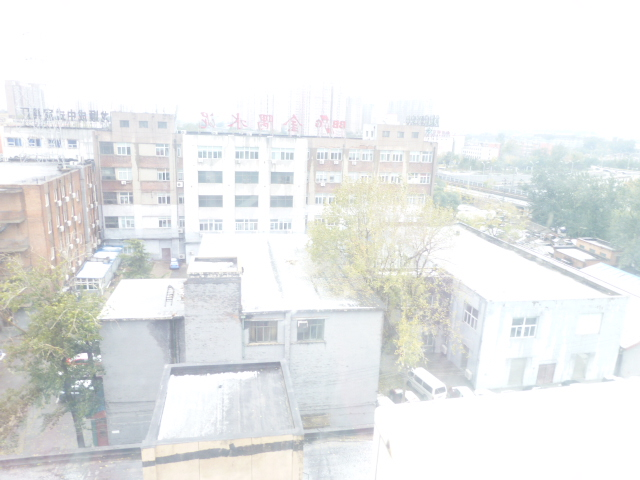

In [7]:
# visualize a random image within the image folder
import random
from PIL import Image

def see_random_image(image_path_str: str):
  image_path = Path(image_path_str)
  if image_path.is_dir():
    image_path_list = list(image_path.glob("*"))
    random_image_path = random.choice(image_path_list)
    print(f"Random image path: {random_image_path}")
    random_image = Image.open(random_image_path)
    return random_image
  else:
    print("Image path does not exist.")

# see_random_image(Path(__file__).resolve().parent() / "images")
see_random_image("/content/drive/MyDrive/AI6121_Assignment1/images")

In [ ]:
# turn images into torch tensors
from torchvision import transforms

def image_to_tensor(image_path_str: str):
  image_path = Path(image_path_str)
  if image_path.exists:
    image = Image.open(image_path)
    transform = transforms.ToTensor()
    tensor = transform(image)
    return tensor
  else:
    print("Image path does not exist.")
    return None

# image_tensor = image_to_tensor(Path(__file__).resolve().parent() / "images" / "sample01.jpg")
image_tensor = image_to_tensor("/content/drive/MyDrive/AI6121_Assignment1/images/sample01.jpg")
image_tensor.shape
# so it's a colour-channel-first tensor

torch.Size([3, 480, 640])

tensor([[0.8118, 0.8039, 0.7922,  ..., 1.0000, 1.0000, 1.0000],
        [0.8392, 0.8275, 0.8157,  ..., 1.0000, 1.0000, 1.0000],
        [0.8392, 0.8314, 0.8275,  ..., 0.9961, 0.9961, 0.9961],
        ...,
        [0.3961, 0.4392, 0.4902,  ..., 0.9529, 0.9529, 0.9529],
        [0.3608, 0.4314, 0.4353,  ..., 0.9451, 0.9529, 0.9686],
        [0.3608, 0.4157, 0.4118,  ..., 0.9451, 0.9529, 0.9686]])

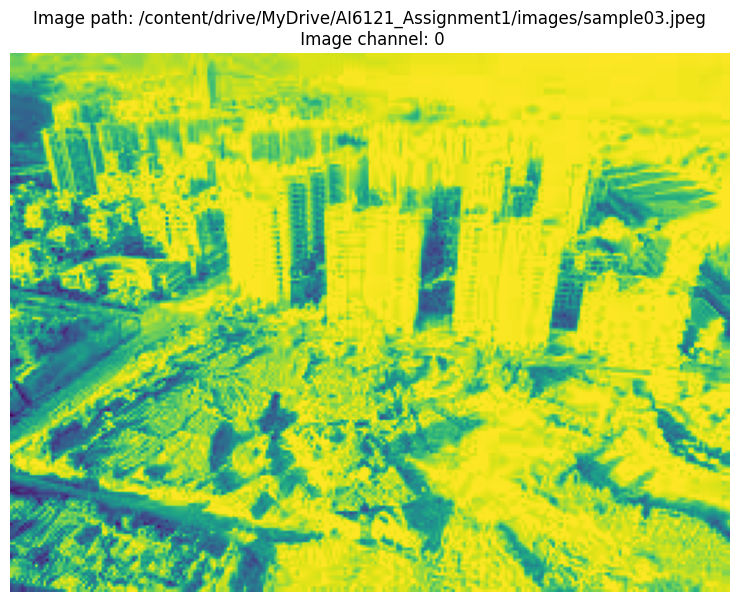

In [ ]:
# select a single colour channel and visualize the image
from matplotlib import pyplot as plt

def see_image_channel(image_path_str: str, channel_number: int=0):
  image_tensor = image_to_tensor(image_path_str)
  if image_tensor is None:
    return None
  else:
    if channel_number not in [0, 1, 2]:
      print("Channel number must be 0, 1 or 2.")
      return None
    else:
      image_channel = image_tensor[channel_number]
      plt.figure(figsize=(10, 7))
      plt.imshow(image_channel)
      plt.title(f"Image path: {image_path_str}\n Image channel: {channel_number}")
      plt.axis("off")
      return image_channel

# see_image_channel(Path(__file__) / "images" / "sample03.jpeg", channel_number=0)
see_image_channel("/content/drive/MyDrive/AI6121_Assignment1/images/sample03.jpeg", channel_number=0)

In [ ]:
! cd /content/drive/MyDrive/AI6121_Assignment1;git add .; git commit -m "Update scripts"; git push origin main

[main 11e38ac] Update scripts
 8 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 images/sample01.jpg
 create mode 100644 images/sample02.jpeg
 create mode 100644 images/sample03.jpeg
 create mode 100644 images/sample04.jpeg
 create mode 100644 images/sample05.jpeg
 create mode 100644 images/sample06.jpg
 create mode 100644 images/sample07.jpg
 create mode 100644 images/sample08.jpg
Enumerating objects: 12, done.
Counting objects: 100% (12/12), done.
Delta compression using up to 2 threads
Compressing objects: 100% (11/11), done.
Writing objects: 100% (11/11), 292.11 KiB | 5.41 MiB/s, done.
Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/XiangKeYiNTU/AI6121_Assignment1.git
   7333613..11e38ac  main -> main


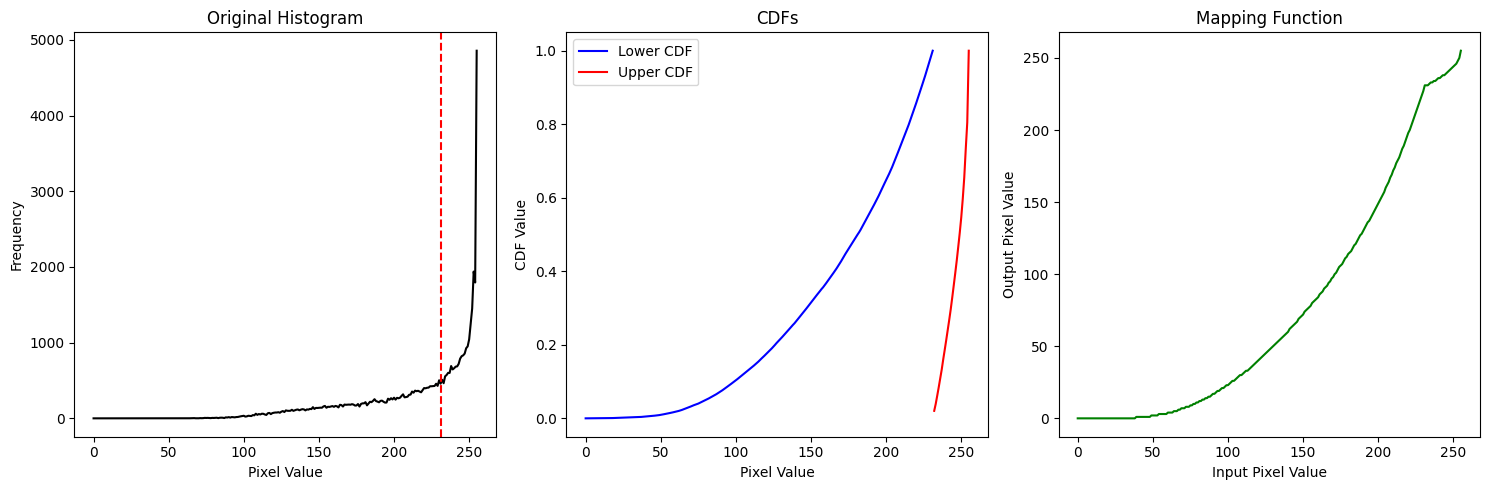

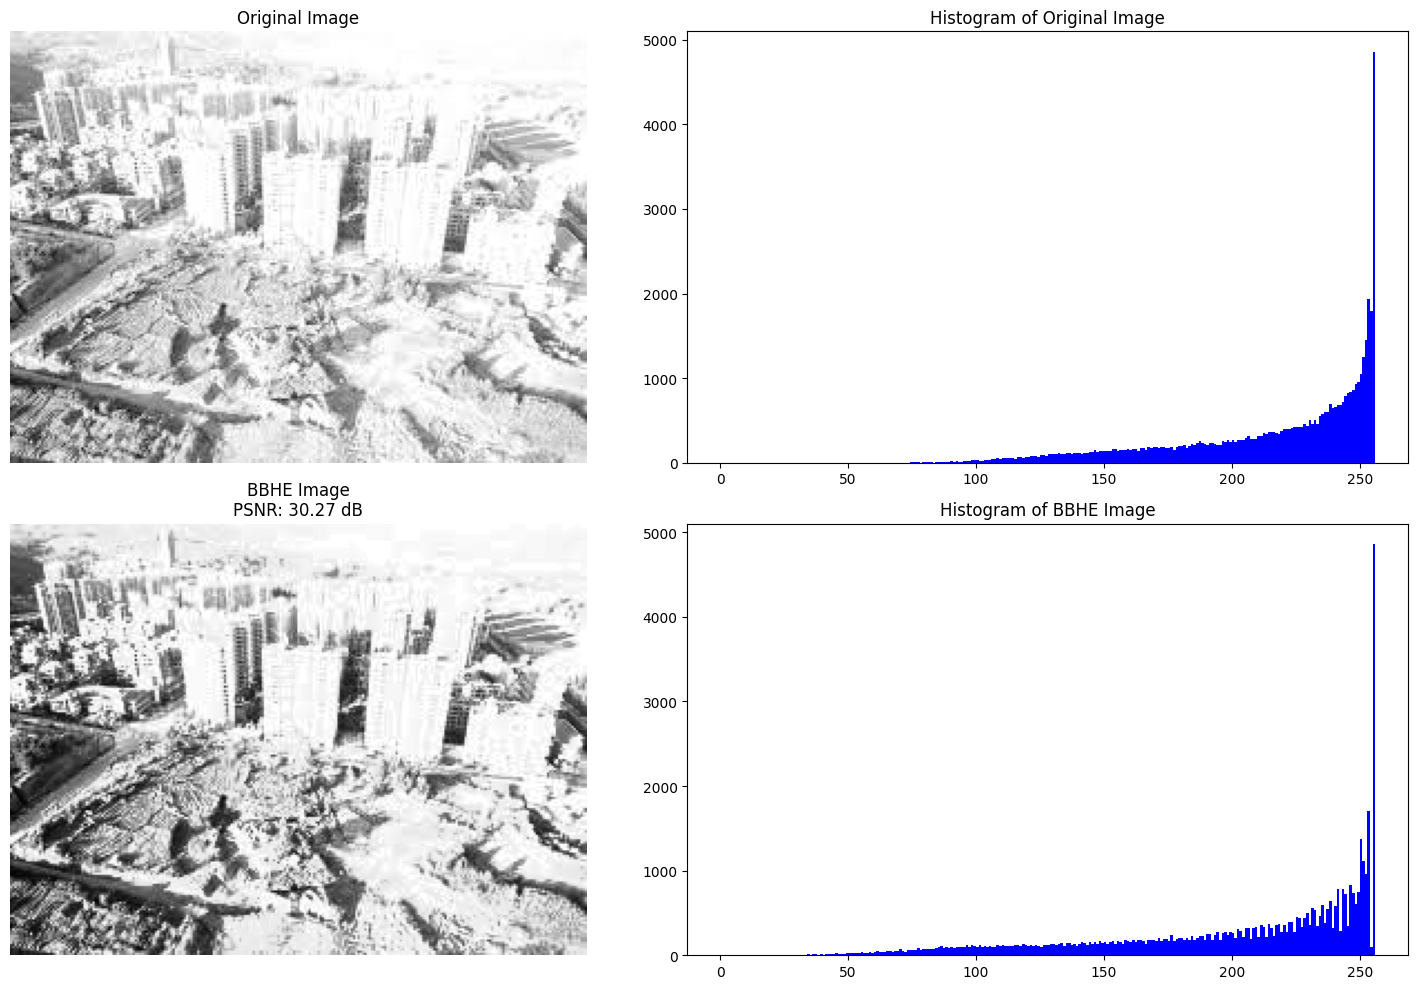

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def expand_hist(hist, target_length):
    """ Expand histogram to the target length using linear interpolation. """
    # Extract non-zero values
    hist_nonzero = hist[np.nonzero(hist)]

    if len(hist_nonzero) == 0:
        print(target_length)
        return np.zeros(target_length, dtype=np.uint64)

    # Indices for the non-zero histogram
    nonzero_indices = np.linspace(0, len(hist_nonzero) - 1, num=len(hist_nonzero))

    # Indices for the target length
    target_indices = np.linspace(0, len(hist_nonzero) - 1, num=target_length)

    # Perform linear interpolation
    expanded_hist = np.interp(target_indices, nonzero_indices, hist_nonzero)
    # print(expanded_hist)
    return expanded_hist.astype(np.uint64)


def bbhe(image):

    # cal histogram
    hist, _ = np.histogram(image.flatten(), 256, [0, 256])

    # cal average brightness
    mean_brightness = int(round(np.median(image)))

    # Initialize histograms for dark and bright regions
    lower_hist = np.zeros(256, dtype=np.uint64)
    upper_hist = np.zeros(256, dtype=np.uint64)

    # Compute histograms for dark and bright regions
    for pixel_value in image.flatten():
        if pixel_value <= mean_brightness:
            lower_hist[pixel_value] += 1
        else:
            upper_hist[pixel_value] += 1

    # print(lower_hist)
    # print(upper_hist)
    # Expand histograms to match the length of LUT
    lower_hist_expanded = expand_hist(lower_hist, mean_brightness + 1)
    upper_hist_expanded = expand_hist(upper_hist, 256 - mean_brightness - 1)


    # Calculate CDFs
    lower_cdf = np.cumsum(lower_hist_expanded) / np.cumsum(lower_hist_expanded)[-1]
    upper_cdf = np.cumsum(upper_hist_expanded) / np.cumsum(upper_hist_expanded)[-1]

    # Normalize CDFs
    C1n = np.uint8(mean_brightness * lower_cdf)
    C2n = np.uint8(mean_brightness + (255 - mean_brightness) * upper_cdf)

    # Create LUT with correct length
    lut = np.zeros(256, dtype=np.uint8)
    lut[:mean_brightness + 1] = C1n
    lut[mean_brightness + 1:] = C2n

    # Visualization
    plt.figure(figsize=(15, 5))

    # Original histogram
    plt.subplot(1, 3, 1)
    plt.plot(hist, color='black')
    plt.axvline(x=mean_brightness, color='r', linestyle='--')
    plt.title('Original Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # CDFs
    plt.subplot(1, 3, 2)
    plt.plot(np.arange(mean_brightness + 1), lower_cdf, color='blue', label='Lower CDF')
    plt.plot(np.arange(mean_brightness + 1, 256),upper_cdf, color='red', label='Upper CDF')
    plt.title('CDFs')
    plt.xlabel('Pixel Value')
    plt.ylabel('CDF Value')
    plt.legend()

    # Mapping function
    plt.subplot(1, 3, 3)
    plt.plot(np.arange(256), lut, color='green')
    plt.title('Mapping Function')
    plt.xlabel('Input Pixel Value')
    plt.ylabel('Output Pixel Value')

    plt.tight_layout()
    plt.show()

    # mapping
    return cv2.LUT(image, lut)


image_path = "/content/drive/MyDrive/AI6121_Assignment1/images/sample03.jpeg"    # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# BBHE
bbhe_img = bbhe(img)

# Cal PSNR
psnr_bbhe = PSNR(img, bbhe_img)

# Show the result
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Original Image and its Histogram
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')
axs[0, 1].hist(img.ravel(), 256, [0, 256], color='b')
axs[0, 1].set_title('Histogram of Original Image')

# CLAHE Image and its Histogram
axs[1, 0].imshow(bbhe_img, cmap='gray')
axs[1, 0].set_title(f'BBHE Image\nPSNR: {psnr_bbhe:.2f} dB')
axs[1, 0].axis('off')
axs[1, 1].hist(clahe_img.ravel(), 256, [0, 256], color='b')
axs[1, 1].set_title('Histogram of BBHE Image')

plt.tight_layout()
plt.show()


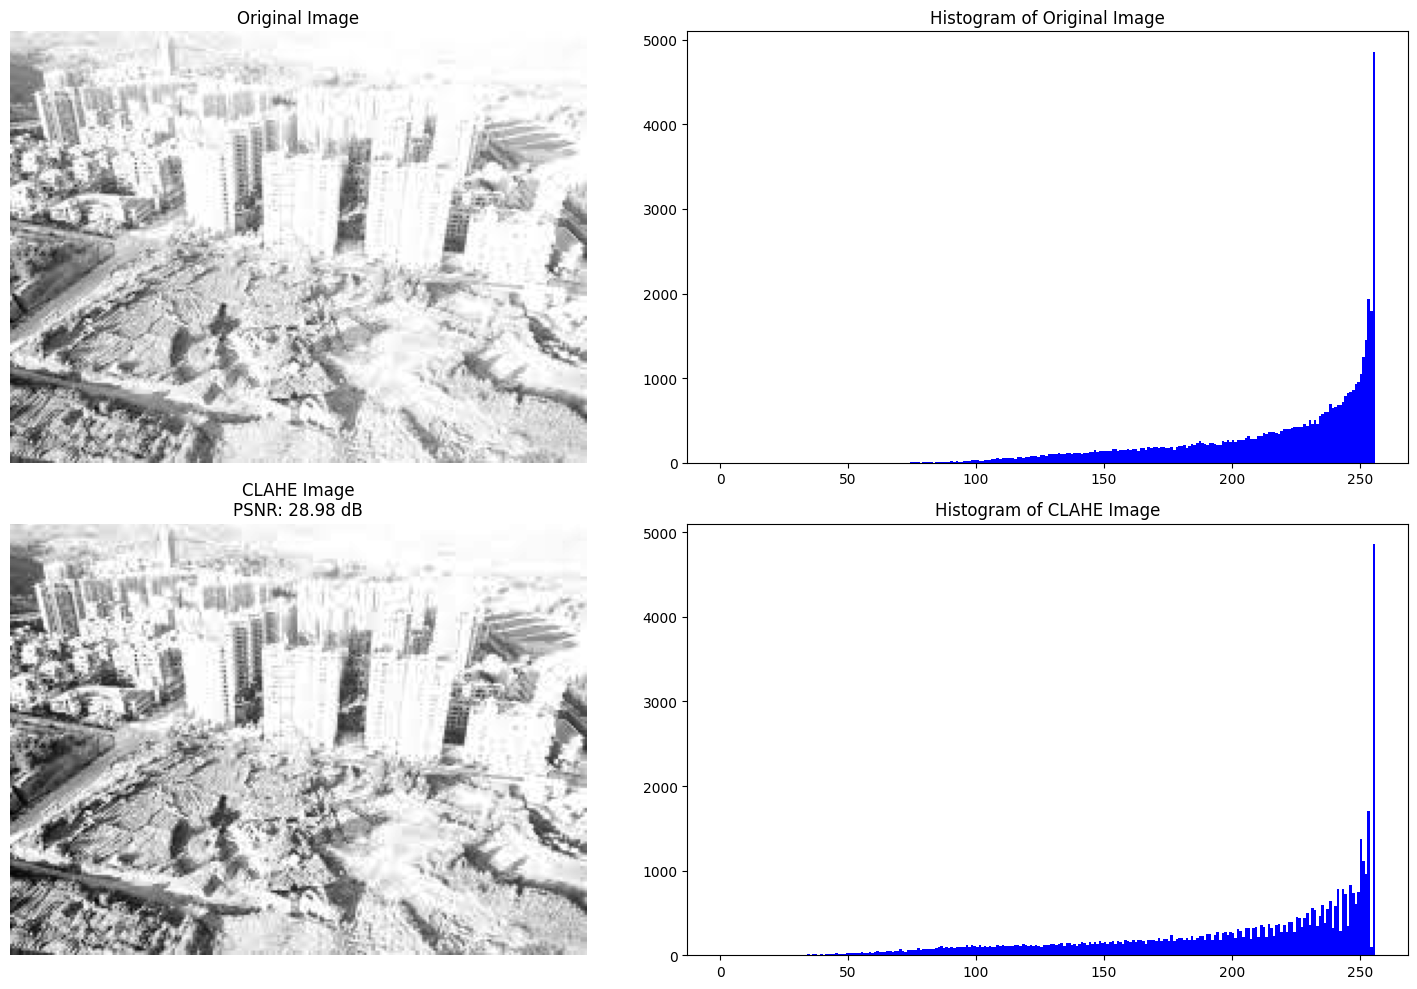

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def clahe(image, clip_limit, tile_grid_size):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(image)


image_path = "/content/drive/MyDrive/AI6121_Assignment1/images/sample03.jpeg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# apply CLAHE
# parameters can change:clip_limit,tile_grid_size
clahe_img = clahe(img, clip_limit=1, tile_grid_size=(4, 4))

# cal PSNR
psnr_bbhe = PSNR(img, clahe_img)

# Show results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Original Image and its Histogram
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')
axs[0, 1].hist(img.ravel(), 256, [0, 256], color='b')
axs[0, 1].set_title('Histogram of Original Image')

# CLAHE Image and its Histogram
axs[1, 0].imshow(clahe_img, cmap='gray')
axs[1, 0].set_title(f'CLAHE Image\nPSNR: {psnr_clahe:.2f} dB')
axs[1, 0].axis('off')
axs[1, 1].hist(clahe_img.ravel(), 256, [0, 256], color='b')
axs[1, 1].set_title('Histogram of CLAHE Image')

plt.tight_layout()
plt.show()

